In [ ]:
pip install pandas matplotlib seaborn

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data, downloaded from https://www.electricitymaps.com/data-portal/united-states-of-america
df = pd.read_csv('data/US-NW-PACE_2023_hourly.csv')
# Check column names
print(df.columns)

Index(['Datetime (UTC)', 'Country', 'Zone Name', 'Zone Id',
       'Carbon Intensity gCO₂eq/kWh (direct)',
       'Carbon Intensity gCO₂eq/kWh (LCA)', 'Low Carbon Percentage',
       'Renewable Percentage', 'Data Source', 'Data Estimated',
       'Data Estimation Method'],
      dtype='object')


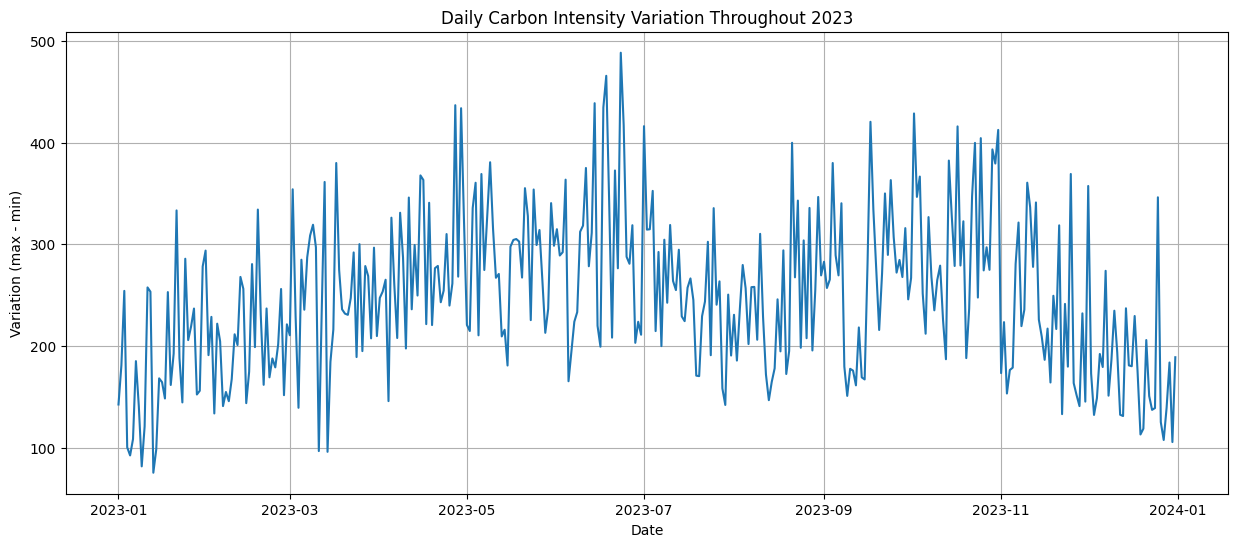

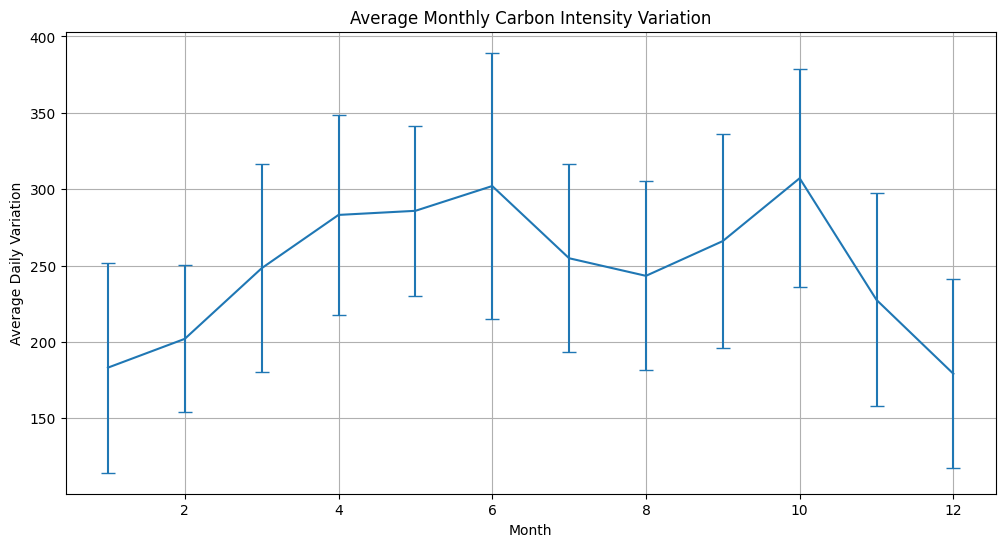


Top 10 Days with Highest Carbon Intensity Variation:
               min     max  variation
date                                 
2023-06-23  329.47  817.82     488.35
2023-06-18  281.97  747.63     465.66
2023-06-14  348.99  787.73     438.74
2023-04-27  309.07  745.84     436.77
2023-06-17  369.65  804.19     434.54
2023-04-29  329.48  763.29     433.81
2023-10-02  411.59  840.25     428.66
2023-09-17  448.35  868.81     420.46
2023-06-24  342.23  759.48     417.25
2023-07-01  474.19  890.35     416.16


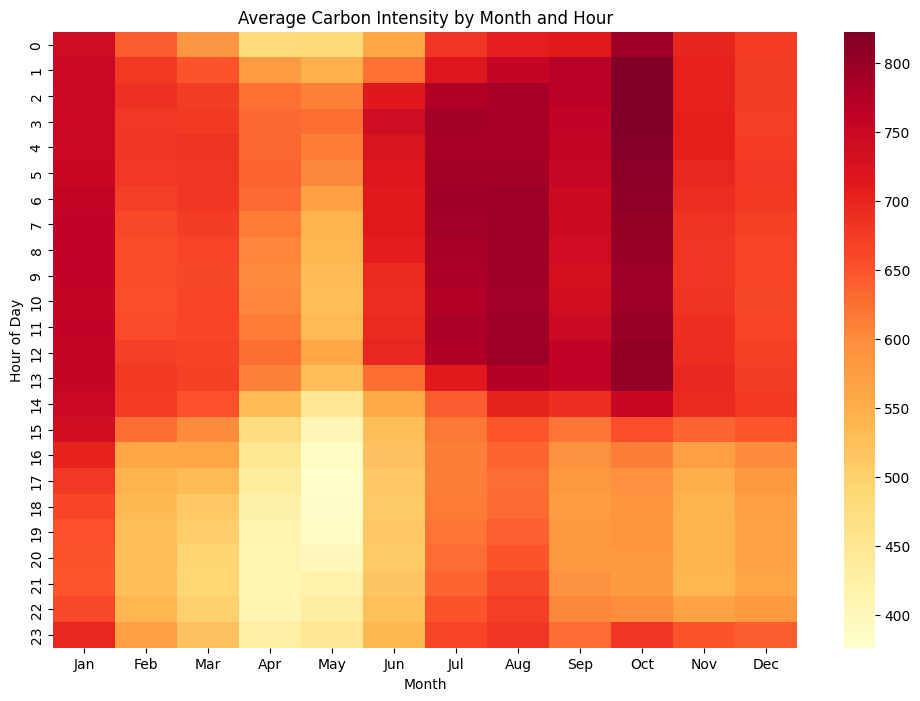

In [99]:

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['Datetime (UTC)'])

# Add columns for date, month, and hour
df['date'] = df['timestamp'].dt.date
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour

# Calculate daily variation (max - min) for each date
daily_variation = df.groupby('date')['Carbon Intensity gCO₂eq/kWh (LCA)'].agg(['min', 'max'])
daily_variation['variation'] = daily_variation['max'] - daily_variation['min']

# Calculate monthly variation statistics
monthly_variation = df.groupby(['month', 'date'])['Carbon Intensity gCO₂eq/kWh (LCA)'].agg(['min', 'max'])
monthly_variation['variation'] = monthly_variation['max'] - monthly_variation['min']
monthly_stats = monthly_variation.groupby('month')['variation'].agg(['mean', 'std'])

# Plot daily variations throughout the year
plt.figure(figsize=(15, 6))
plt.plot(daily_variation.index, daily_variation['variation'])
plt.title('Daily Carbon Intensity Variation Throughout 2023')
plt.xlabel('Date')
plt.ylabel('Variation (max - min)')
plt.grid(True)
plt.show()

# Plot monthly average variations with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(monthly_stats.index, monthly_stats['mean'], 
             yerr=monthly_stats['std'], capsize=5)
plt.title('Average Monthly Carbon Intensity Variation')
plt.xlabel('Month')
plt.ylabel('Average Daily Variation')
plt.grid(True)
plt.show()

# Find the top 10 days with highest variation
print("\nTop 10 Days with Highest Carbon Intensity Variation:")
print(daily_variation.sort_values('variation', ascending=False).head(10))

# Create a heatmap of average carbon intensity by month and hour
hourly_monthly_avg = df.pivot_table(
    values='Carbon Intensity gCO₂eq/kWh (LCA)', 
    index='hour',
    columns='month',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(hourly_monthly_avg, cmap='YlOrRd', 
            xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Average Carbon Intensity by Month and Hour')
plt.xlabel('Month')
plt.ylabel('Hour of Day')
plt.show()

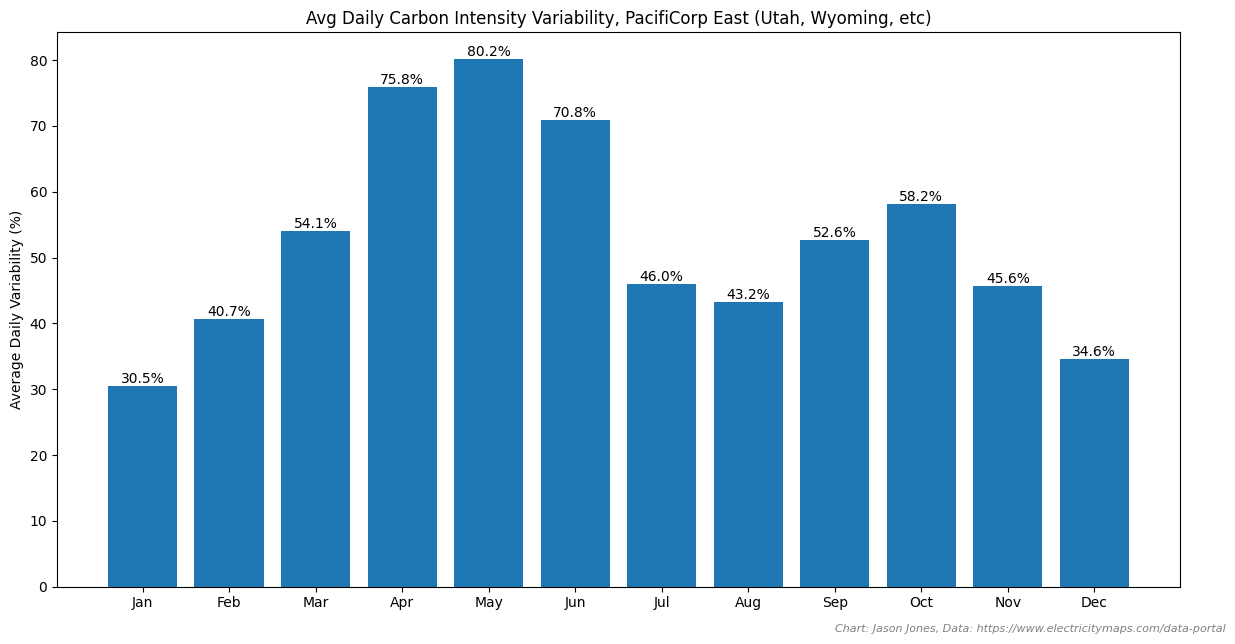


Monthly average percentage increases:
Month 1: 30.5%
Month 2: 40.7%
Month 3: 54.1%
Month 4: 75.8%
Month 5: 80.2%
Month 6: 70.8%
Month 7: 46.0%
Month 8: 43.2%
Month 9: 52.6%
Month 10: 58.2%
Month 11: 45.6%
Month 12: 34.6%


In [100]:
# Calculate percentage increase from min to max for each day
daily_variation['percent_increase'] = ((daily_variation['max'] - daily_variation['min']) / daily_variation['min']) * 100
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Add month information to daily_variation
daily_variation = daily_variation.reset_index()
daily_variation['month'] = pd.to_datetime(daily_variation['date']).dt.month

# Calculate monthly average percentage increase
monthly_avg_increase = daily_variation.groupby('month')['percent_increase'].mean()

# Plot monthly average percentage increases
plt.figure(figsize=(12, 6.5))
plt.bar([month_names[m] for m in monthly_avg_increase.index], monthly_avg_increase.values)
plt.title('Avg Daily Carbon Intensity Variability, PacifiCorp East (Utah, Wyoming, etc)')
plt.xlabel(' ', x=.45)
plt.ylabel('Average Daily Variability (%)')

# plt.grid(True, axis='y')

# Add value labels on top of each bar
for i, (month, v) in enumerate(zip([month_names[m] for m in monthly_avg_increase.index], monthly_avg_increase.values)):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# Add source text at the bottom
plt.figtext(0.7, 0.02, 'Chart: Jason Jones, Data: https://www.electricitymaps.com/data-portal', 
           fontsize=8, style='italic', color='gray')

plt.tight_layout()

plt.show()

# Print the values
print("\nMonthly average percentage increases:")
for month, value in monthly_avg_increase.items():
    print(f"Month {month}: {value:.1f}%")

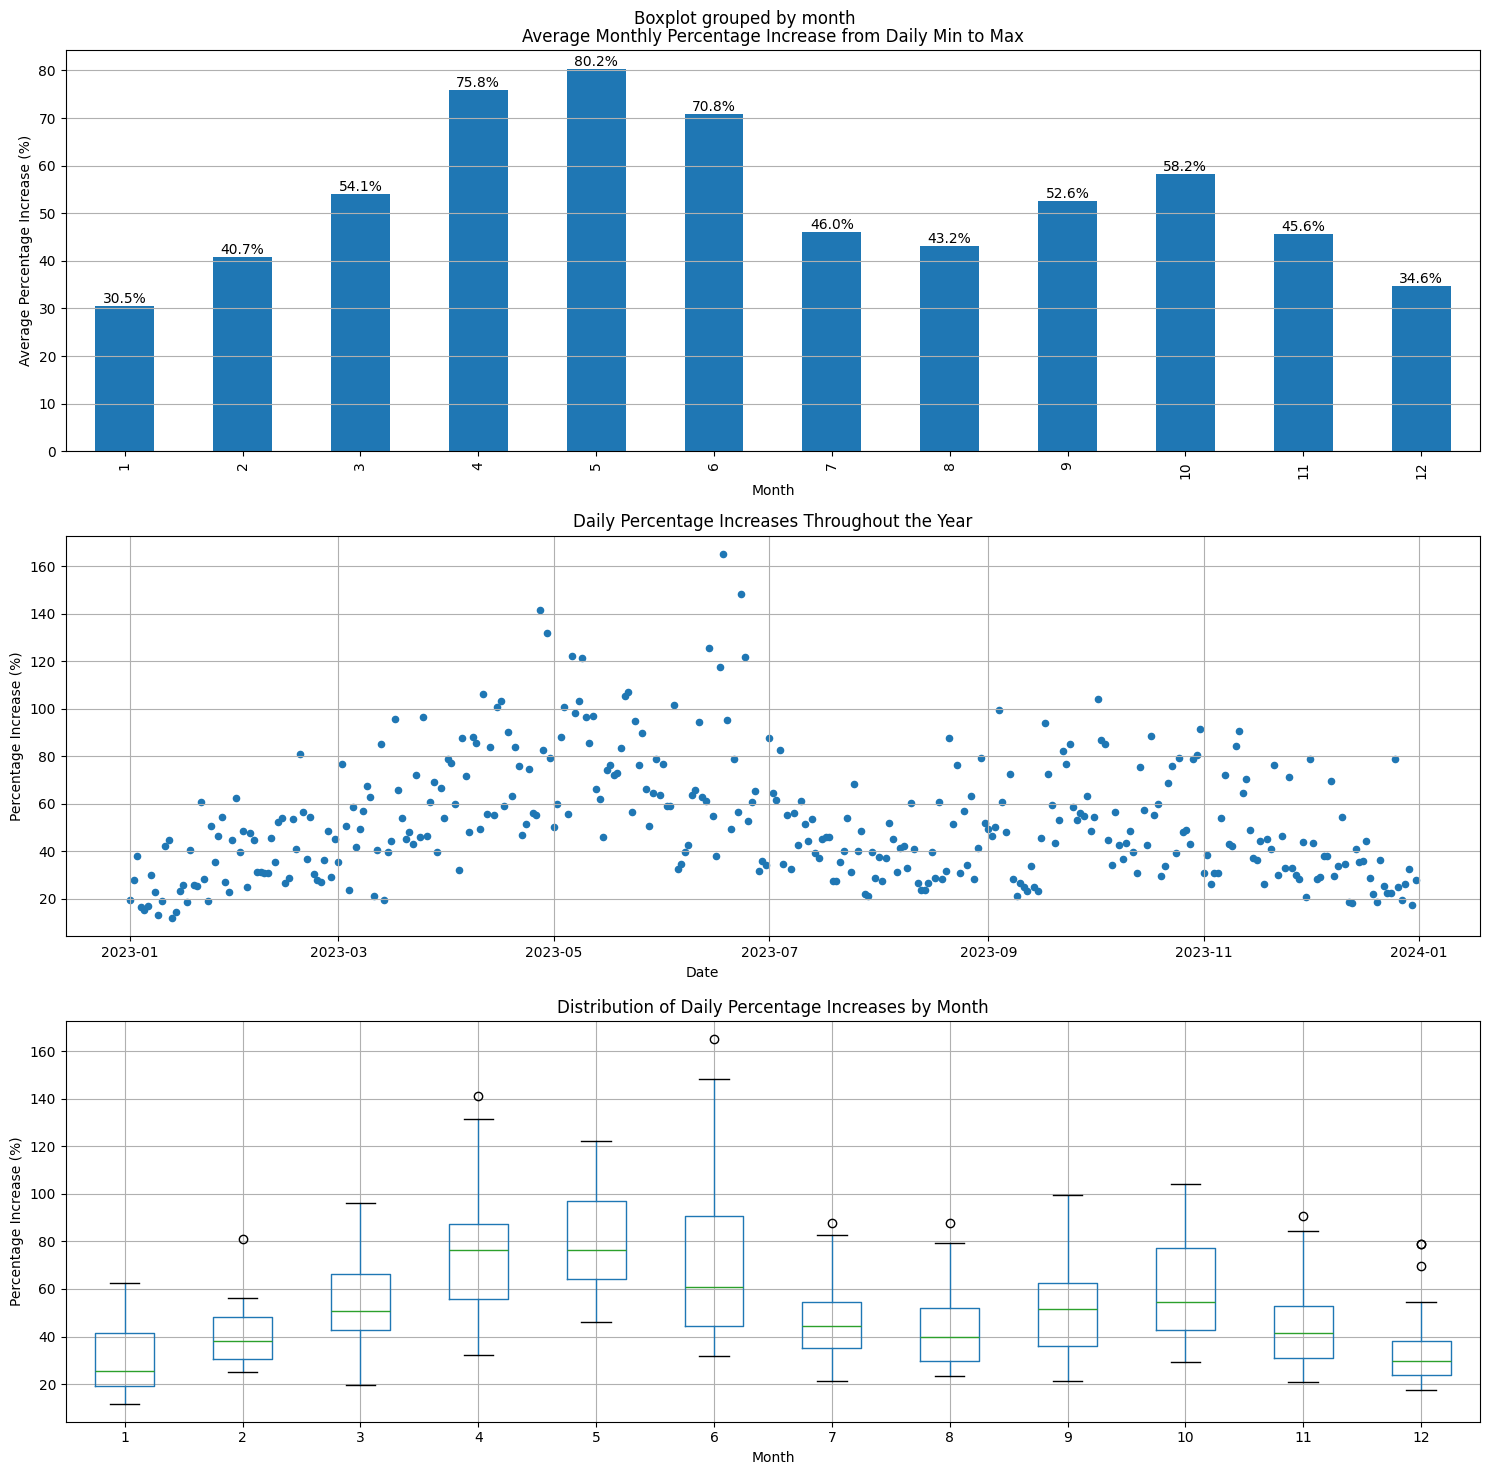


Summary Statistics of Daily Variations:
count    365.000000
mean      52.714366
std       25.437194
min       11.823431
25%       32.853471
50%       47.919259
75%       66.154089
max      165.145228
Name: percent_increase, dtype: float64


In [92]:
# Create a figure with multiple subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

# 1. Monthly averages (bar chart) - keeping your existing visualization
monthly_avg_increase.plot(kind='bar', ax=ax1)
ax1.set_title('Average Monthly Percentage Increase from Daily Min to Max')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Percentage Increase (%)')
ax1.grid(True, axis='y')
for i, v in enumerate(monthly_avg_increase.values):
    ax1.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# 2. Daily variations throughout the year (scatter plot)
daily_variation.plot(x='date', y='percent_increase', kind='scatter', ax=ax2)
ax2.set_title('Daily Percentage Increases Throughout the Year')
ax2.set_xlabel('Date', x=.45)
ax2.set_ylabel('Percentage Increase (%)')
ax2.grid(True)

# 3. Box plot to show distribution by month
daily_variation.boxplot(column='percent_increase', by='month', ax=ax3)
ax3.set_title('Distribution of Daily Percentage Increases by Month')
ax3.set_xlabel('Month')
ax3.set_ylabel('Percentage Increase (%)')
ax3.grid(True)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics of Daily Variations:")
print(daily_variation['percent_increase'].describe())

In [101]:
# Filter for May
may_variations = daily_variation[daily_variation['month'] == 5].copy()

# Sort by date
may_variations = may_variations.sort_values('date')

# Create formatted output
print("May 2023 Daily Carbon Intensity Variations:")
print("\nDate         Min     Max     % Increase")
print("-" * 45)
for _, row in may_variations.iterrows():
    print(f"{row['date'].strftime('%Y-%m-%d')}  {row['min']:6.1f}  {row['max']:6.1f}  {row['percent_increase']:8.1f}%")

# Print summary statistics for May
print("\nMay Summary:")
print(f"Average daily increase: {may_variations['percent_increase'].mean():.1f}%")
print(f"Highest daily increase: {may_variations['percent_increase'].max():.1f}%")
print(f"Lowest daily increase:  {may_variations['percent_increase'].min():.1f}%")

May 2023 Daily Carbon Intensity Variations:

Date         Min     Max     % Increase
---------------------------------------------
2023-05-01   439.2   660.0      50.3%
2023-05-02   357.8   572.6      60.1%
2023-05-03   381.2   717.0      88.1%
2023-05-04   357.5   718.1     100.8%
2023-05-05   378.2   588.8      55.7%
2023-05-06   301.9   671.1     122.3%
2023-05-07   279.6   554.4      98.3%
2023-05-08   316.3   643.1     103.3%
2023-05-09   314.0   694.7     121.3%
2023-05-10   326.7   642.3      96.6%
2023-05-11   312.1   579.2      85.6%
2023-05-12   279.0   549.9      97.1%
2023-05-13   316.7   526.2      66.2%
2023-05-14   347.5   563.6      62.2%
2023-05-15   392.3   573.2      46.1%
2023-05-16   402.0   699.7      74.1%
2023-05-17   399.1   703.4      76.3%
2023-05-18   422.8   728.1      72.2%
2023-05-19   414.2   717.0      73.1%
2023-05-20   320.8   588.1      83.4%
2023-05-21   336.7   692.0     105.5%
2023-05-22   306.5   634.3     106.9%
2023-05-23   398.2   623.8      5

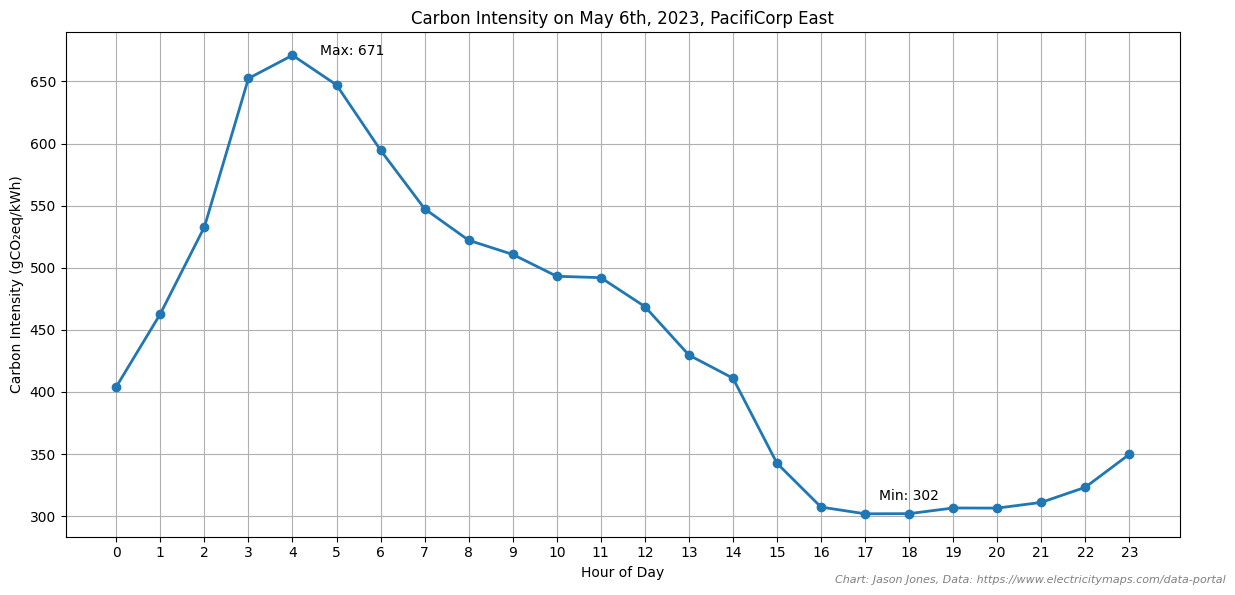


Minimum: 302 at hour 17
Maximum: 671 at hour 4
Increase: 122.3%


In [129]:
# Filter for May 6th
may_6_data = df[df['timestamp'].dt.date == pd.to_datetime('2023-05-06').date()].copy()

# Sort by timestamp to ensure proper ordering
may_6_data = may_6_data.sort_values('timestamp')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(may_6_data['timestamp'].dt.hour, may_6_data['Carbon Intensity gCO₂eq/kWh (LCA)'], 
         marker='o', linestyle='-', linewidth=2)

# Customize the plot
plt.title('Carbon Intensity on May 6th, 2023, PacifiCorp East')
plt.xlabel('Hour of Day')  # Moved x-axis label to the left
plt.ylabel('Carbon Intensity (gCO₂eq/kWh)')
plt.grid(True)
plt.xticks(range(0, 24))

# Add min and max annotations
min_value = may_6_data['Carbon Intensity gCO₂eq/kWh (LCA)'].min()
max_value = may_6_data['Carbon Intensity gCO₂eq/kWh (LCA)'].max()
min_hour = may_6_data.loc[may_6_data['Carbon Intensity gCO₂eq/kWh (LCA)'].idxmin(), 'timestamp'].hour
max_hour = may_6_data.loc[may_6_data['Carbon Intensity gCO₂eq/kWh (LCA)'].idxmax(), 'timestamp'].hour

plt.annotate(f'Min: {min_value:.0f}', 
            xy=(min_hour, min_value), 
            xytext=(10, 10), 
            textcoords='offset points')
plt.annotate(f'Max: {max_value:.0f}', 
            xy=(max_hour, max_value), 
            xytext=(20, 0), 
            textcoords='offset points')

# Add source text at the bottom
plt.figtext(0.7, 0.02, 'Chart: Jason Jones, Data: https://www.electricitymaps.com/data-portal', 
           fontsize=8, style='italic', color='gray')

plt.tight_layout()

plt.show()

# Print summary statistics
print(f"\nMinimum: {min_value:.0f} at hour {min_hour}")
print(f"Maximum: {max_value:.0f} at hour {max_hour}")
print(f"Increase: {((max_value - min_value) / min_value * 100):.1f}%")

In [157]:
# Filter for May 6th
may_6_data = df[df['timestamp'].dt.date == pd.to_datetime('2023-05-06').date()].copy()

# Sort by timestamp to ensure proper ordering
may_6_data = may_6_data.sort_values('timestamp')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(may_6_data['timestamp'].dt.hour, may_6_data['Carbon Intensity gCO₂eq/kWh (LCA)'], 
         marker='o', linestyle='-', linewidth=2)

# Create list of hour labels with AM/PM only at 12am and 12pm
hour_labels = []
for h in range(24):
    if h == 0:
        hour_labels.append('12am')
    elif h == 12:
        hour_labels.append('12pm')
    else:
        hour_labels.append(f'{h%12 or 12}')
# Set the x-ticks and labels
plt.xticks(range(24), hour_labels)

# Add shaded regions below the curve
# For 3am to 5am (gray)
mask_3_5 = (may_6_data['timestamp'].dt.hour >= 3) & (may_6_data['timestamp'].dt.hour <= 5)
plt.fill_between(may_6_data[mask_3_5]['timestamp'].dt.hour, 
                0, 
                may_6_data[mask_3_5]['Carbon Intensity gCO₂eq/kWh (LCA)'],
                color='gray', alpha=0.2)

# Calculate area for 3-5am
area_3_5 = np.trapezoid(may_6_data[mask_3_5]['Carbon Intensity gCO₂eq/kWh (LCA)'], 
                    may_6_data[mask_3_5]['timestamp'].dt.hour)


# For 4pm to 6pm (green)
mask_16_18 = (may_6_data['timestamp'].dt.hour >= 16) & (may_6_data['timestamp'].dt.hour <= 18)
plt.fill_between(may_6_data[mask_16_18]['timestamp'].dt.hour, 
                0, 
                may_6_data[mask_16_18]['Carbon Intensity gCO₂eq/kWh (LCA)'],
                color='green', alpha=0.2)

# Calculate area for 4-6pm
area_16_18 = np.trapezoid(may_6_data[mask_16_18]['Carbon Intensity gCO₂eq/kWh (LCA)'], 
                      may_6_data[mask_16_18]['timestamp'].dt.hour)


# Add label for 4-6pm region
plt.text(17, 100, f'$\\mathbf{{{20 * area_16_18:,.0f}}}$\ngCO₂', 
         ha='center', va='center',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
# Add label for 3-5am region
plt.text(4, 500, f'$\\mathbf{{{20 * area_3_5:,.0f}}}$\ngCO₂', 
         ha='center', va='center', 
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.text(10, 300, r'$\mathbf{When\,you\,charge\,matters!}$' + 
         '\nCompare 2hr charging\nat high and low\ncarbon times.\n\n' +
         fr'$\mathbf{{{area_3_5/area_16_18:.1f}x\,More\,Emissions!}}$',
         ha='center', va='center',
         bbox=dict(facecolor='yellow', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.5'))


# Customize the plot
plt.title('Carbon Intensity on May 6th, 2023, PacifiCorp East')
plt.xlabel('Hour of Day')  # Moved x-axis label to the left
plt.ylabel('Carbon Intensity (gCO₂eq/kWh)')
# plt.grid(True)
plt.xticks(range(0, 24))

# Add min and max annotations
min_value = may_6_data['Carbon Intensity gCO₂eq/kWh (LCA)'].min()
max_value = may_6_data['Carbon Intensity gCO₂eq/kWh (LCA)'].max()
min_hour = may_6_data.loc[may_6_data['Carbon Intensity gCO₂eq/kWh (LCA)'].idxmin(), 'timestamp'].hour
max_hour = may_6_data.loc[may_6_data['Carbon Intensity gCO₂eq/kWh (LCA)'].idxmax(), 'timestamp'].hour

plt.ylim(0, max_value + 50)
plt.annotate(f'Min: {min_value:.0f}', 
            xy=(min_hour, min_value), 
            xytext=(10, 10), 
            textcoords='offset points')
plt.annotate(f'Max: {max_value:.0f}', 
            xy=(max_hour, max_value), 
            xytext=(20, 0), 
            textcoords='offset points')

# Add source text at the bottom
plt.figtext(0.7, 0.02, 'Chart: Jason Jones, Data: https://www.electricitymaps.com/data-portal', 
           fontsize=8, style='italic', color='gray')

plt.tight_layout()

plt.show()

# Print summary statistics
print(f"\nMinimum: {min_value:.1f} at hour {min_hour}")
print(f"Maximum: {max_value:.1f} at hour {max_hour}")
print(f"Increase: {((max_value - min_value) / min_value * 100):.1f}%")

# Print the areas
print(f"\nArea under curve 3-5am: {area_3_5:.1f} gCO₂eq/kWh·hour")
print(f"Area under curve 4-6pm: {area_16_18:.1f} gCO₂eq/kWh·hour")

SyntaxError: '(' was never closed (3751796487.py, line 58)

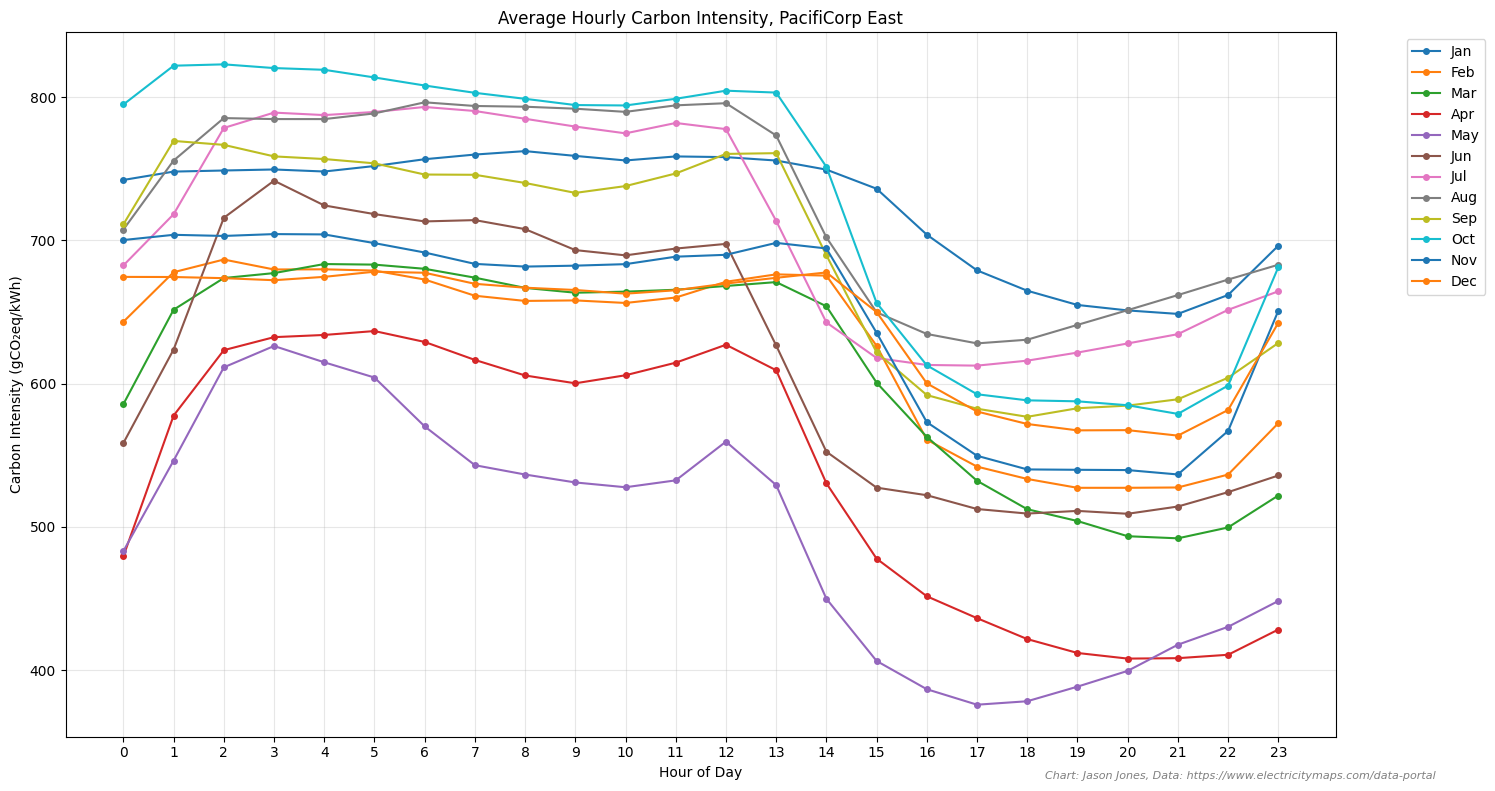


Hourly averages by month:
hour      0      1      2      3      4      5      6      7      8      9   \
month                                                                         
Jan    742.1  748.0  748.7  749.4  748.0  751.8  756.6  759.8  762.2  758.9   
Feb    643.2  677.7  686.6  679.6  679.8  678.9  672.6  661.3  657.7  658.1   
Mar    585.7  651.6  673.7  677.1  683.4  683.0  680.1  673.9  666.8  663.4   
Apr    479.5  577.7  623.3  632.4  634.0  636.7  629.1  616.5  605.7  600.2   
May    483.1  546.3  611.4  626.3  614.9  604.2  570.1  543.1  536.6  531.0   
Jun    558.5  623.8  715.7  741.6  724.3  718.3  713.2  714.1  707.8  693.2   
Jul    682.5  718.2  778.4  789.1  787.4  789.6  793.0  790.2  784.8  779.4   
Aug    707.5  755.7  785.3  784.6  784.6  788.6  796.3  793.7  793.2  791.8   
Sep    711.2  769.4  766.6  758.6  756.7  753.7  745.9  745.7  740.0  733.1   
Oct    794.8  821.8  822.8  820.2  819.0  813.6  808.0  802.9  798.7  794.4   
Nov    700.2  703.8  703.

In [61]:
# Create a month number to name mapping
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Calculate hourly averages for each month
hourly_by_month = df.groupby(['month', 'hour'])['Carbon Intensity gCO₂eq/kWh (LCA)'].mean().unstack()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot a line for each month
for month in hourly_by_month.index:
    plt.plot(hourly_by_month.columns, 
            hourly_by_month.loc[month], 
            label=month_names[month],
            marker='o',
            markersize=4)

plt.title('Average Hourly Carbon Intensity, PacifiCorp East')
plt.xlabel('Hour of Day')
plt.ylabel('Carbon Intensity (gCO₂eq/kWh)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Add source text at the bottom
plt.figtext(0.7, 0.02, 'Chart: Jason Jones, Data: https://www.electricitymaps.com/data-portal', 
           fontsize=8, style='italic', color='gray')

plt.tight_layout()

# Set x-axis ticks to show all 24 hours
plt.xticks(range(24))

plt.show()

# Rename the index for the printed table
hourly_by_month.index = hourly_by_month.index.map(month_names)
print("\nHourly averages by month:")
print(hourly_by_month.round(1))

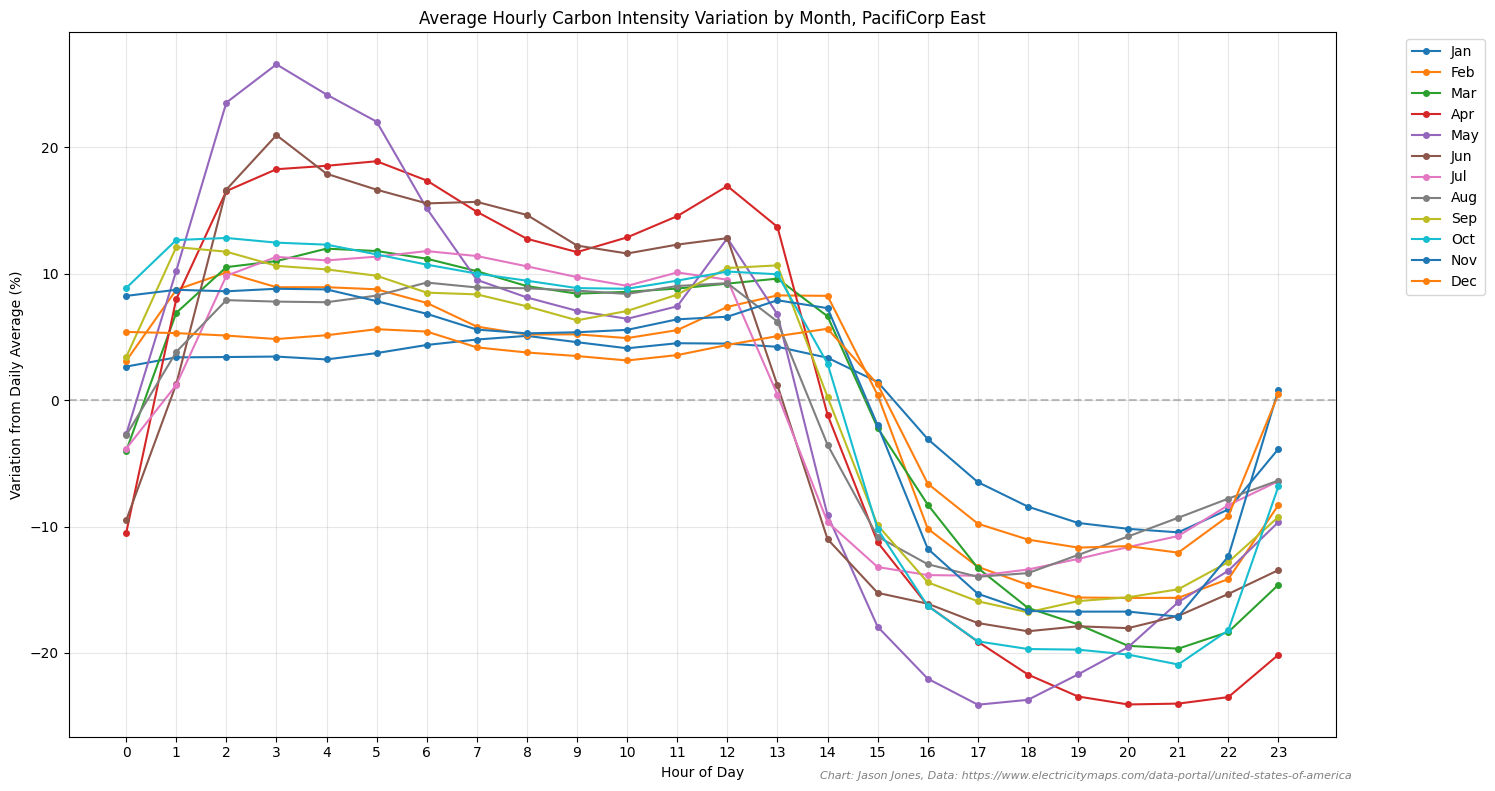


Hourly variations by month (percentage from daily average):
hour     0     1     2     3     4     5     6     7     8     9   ...    14  \
month                                                              ...         
Jan     2.7   3.4   3.4   3.5   3.2   3.7   4.4   4.8   5.1   4.6  ...   3.4   
Feb     3.1   8.7  10.1   8.9   8.9   8.8   7.7   5.8   5.2   5.2  ...   8.3   
Mar    -4.0   6.9  10.5  11.0  12.0  11.8  11.2  10.2   9.0   8.4  ...   6.6   
Apr   -10.5   8.0  16.5  18.3  18.5  18.9  17.4  14.9  12.8  11.7  ...  -1.1   
May    -2.7  10.2  23.5  26.6  24.2  22.0  15.2   9.5   8.1   7.1  ...  -9.1   
Jun    -9.5   1.3  16.7  21.0  17.9  16.7  15.6  15.7  14.7  12.2  ... -11.0   
Jul    -3.8   1.2   9.8  11.3  11.1  11.4  11.8  11.4  10.6   9.7  ...  -9.6   
Aug    -2.8   3.8   7.9   7.8   7.8   8.3   9.3   8.9   8.9   8.7  ...  -3.5   
Sep     3.4  12.1  11.7  10.6  10.4   9.8   8.5   8.4   7.4   6.3  ...   0.3   
Oct     8.9  12.7  12.8  12.5  12.3  11.5  10.7  10.0   9.5

In [55]:
# Calculate daily averages for each month
daily_avgs = df.groupby(['month', 'date'])['Carbon Intensity gCO₂eq/kWh (LCA)'].mean()
# Broadcast daily averages back to hourly data
df['daily_avg'] = df.groupby(['date'])['Carbon Intensity gCO₂eq/kWh (LCA)'].transform('mean')
# Calculate percentage variation from daily average
df['percent_variation'] = ((df['Carbon Intensity gCO₂eq/kWh (LCA)'] - df['daily_avg']) / df['daily_avg']) * 100

# Calculate average hourly variations for each month
hourly_variations = df.groupby(['month', 'hour'])['percent_variation'].mean().unstack()

# Create the plot
plt.figure(figsize=(15, 8))

# Plot a line for each month
for month in hourly_variations.index:
    plt.plot(hourly_variations.columns, 
            hourly_variations.loc[month], 
            label=month_names[month],
            marker='o',
            markersize=4)

plt.title('Average Hourly Carbon Intensity Variation by Month, PacifiCorp East')
plt.xlabel('Hour of Day')
plt.ylabel('Variation from Daily Average (%)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add source text at the bottom
plt.figtext(0.55, 0.02, 'Chart: Jason Jones, Data: https://www.electricitymaps.com/data-portal/united-states-of-america', 
           fontsize=8, style='italic', color='gray')

plt.tight_layout()

# Set x-axis ticks to show all 24 hours
plt.xticks(range(24))

# Add a horizontal line at y=0 to show the baseline
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

plt.show()

# Rename the index for the printed table
hourly_variations.index = hourly_variations.index.map(month_names)
print("\nHourly variations by month (percentage from daily average):")
print(hourly_variations.round(1))